#EOF解析の概要

EOF解析はデータを要約するための代表的な手段であり、経験的直行関数解析と呼ばれる。
$$ z(t,x)=\sum_{m=1}^\omega T_m(t) X_m(x) $$
ここでzはデータ(変位)、mはモード番号、Tを時間関数、空間関数をXとしておいている。
観測データを$N \times P$の行列**Z**として表すとこのモード展開は、
$$\mathbf{Z}=\mathbf{TX^T}$$
$z_{1t}$は$(\sum_{m=1}^\omega T_m(t=1) X_m(x=1),\sum_{m=1}^\omega T_m(t=2) X_m(x=1),....)$

In [2]:
# from google.colab import drive
# drive.mount(r'/content/gdrive')
# %cd /content/gdrive/MyDrive/勉強/基礎数学/解析学/program/

# !jupyter nbconvert --to python test_data_tools.ipynb
# import test_data_tools as tdt
# !jupyter nbconvert --to python pca_tools.ipynb
# import pca_tools as pt
# !jupyter nbconvert --to python our_kpca.ipynb
# import pca_tools as pt
import sys, os
sys.path.append("..")
import knool.analyzer.signal_tools as signal_tools
test=signal_tools

In [3]:
import os
import sys
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import signal
from scipy.signal import hilbert
from scipy import hamming
import matplotlib.animation as animation


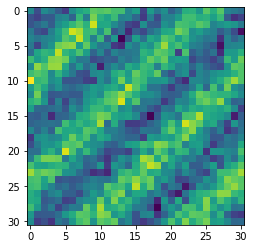

In [2]:
xmax=31
ymax=31
tmax=102

data0=tdt.make_wave_2D(45,45,0.8,[tmax,ymax,xmax])
data=data0.real+np.random.normal(0,0.5,(tmax,ymax,xmax))


plt.imshow(data[0,:,:])

# fig = plt.figure(figsize = (8, 8))
# def update(i):
#     if i != 0:
#         plt.cla()
#     plt.imshow(signal[i,:,:])
#     #plt.imshow(signal[i,:,:])
# #,fargs = (signal)
# ani = animation.FuncAnimation(fig,update, interval=100,frames=tmax)
# fig.show()
# ani.save("output.gif", writer="pillow")

(961,) (961, 961)
第 1 主成分寄与率： 34.715594849238975 インデックス: 960
第 2 主成分寄与率： 33.1031982574179 インデックス: 959
第 3 主成分寄与率： 0.5506536774832484 インデックス: 958
第 4 主成分寄与率： 0.5396482117142778 インデックス: 957
第 5 主成分寄与率： 0.5332899524292165 インデックス: 956
第 6 主成分寄与率： 0.5230366449183179 インデックス: 955
第 7 主成分寄与率： 0.5152265142659259 インデックス: 954
第 8 主成分寄与率： 0.5132884466641127 インデックス: 953
第 9 主成分寄与率： 0.5018750510075143 インデックス: 952
第 10 主成分寄与率： 0.49480663124731133 インデックス: 951
第 10 主成分までの累積寄与率: 71.99061823638684
(102, 3)
[252.8743792  241.12940438]
0.9999999999999996
116.60550413074921


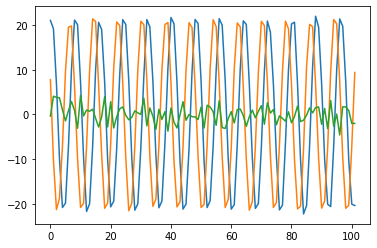

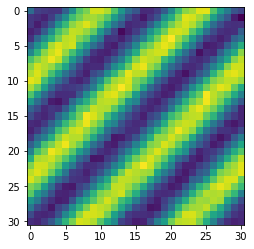

(961,) (961, 961)
第 1 主成分寄与率： 34.715594849238975 インデックス: 960
第 2 主成分寄与率： 33.1031982574179 インデックス: 959
第 3 主成分寄与率： 0.5506536774832484 インデックス: 958
第 4 主成分寄与率： 0.5396482117142778 インデックス: 957
第 5 主成分寄与率： 0.5332899524292165 インデックス: 956
第 6 主成分寄与率： 0.5230366449183179 インデックス: 955
第 7 主成分寄与率： 0.5152265142659259 インデックス: 954
第 8 主成分寄与率： 0.5132884466641127 インデックス: 953
第 9 主成分寄与率： 0.5018750510075143 インデックス: 952
第 10 主成分寄与率： 0.49480663124731133 インデックス: 951
第 10 主成分までの累積寄与率: 71.99061823638684
(102, 2)
(961, 2) (102, 2)
(102, 31, 31)


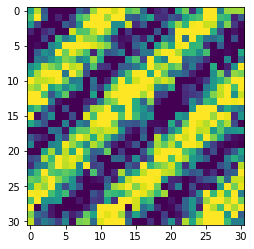

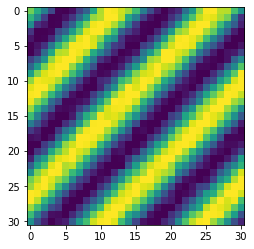

In [3]:
spatial,score,eig_val=pt.calc_EOF_from_xyt(data,mmin=1,mmax=3)
#print(score.shape,spatial.shape)
print(eig_val[0:2])
print(np.linalg.norm(spatial[0:1].reshape(xmax*ymax)))
print(np.cov(score[0,:]))
plt.plot(score[:,0])  #第1モード
plt.plot(score[:,1])  #第2モード
plt.plot(score[:,2])  #第3モード
plt.show()
plt.imshow(spatial[0,:,:]) #第一モード
plt.show()
plt.imshow(spatial[1,:,:]) #第二モード

data2=pt.remove_noise_for_xyt(data,2)
print(data2.shape)
plt.imshow(data[15,:,:],vmin=-1,vmax=1)
plt.show()
plt.imshow(data2[15,:,:],vmin=-1,vmax=1)

-1.940393269601636
1.9526513795566334


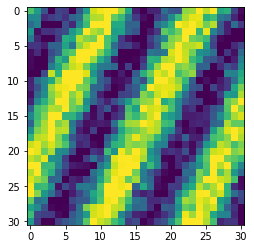

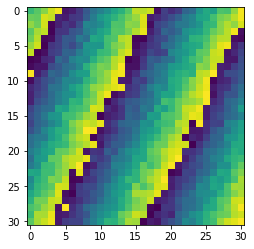

In [12]:
xmax=31
ymax=31
tmax=102

data=tdt.make_wave_2D(30,25,1.0,[tmax,ymax,xmax])
data=data+np.random.normal(0,0.25,(tmax,ymax,xmax))+1j*np.random.normal(0,0.25,(tmax,ymax,xmax))

#data=np.transpose(data,(0,2,1))

test=np.angle(data[0,:,:])
print(data.real.min())
print(data.real.max())
plt.imshow(data[0,:,:].real,vmin=-1,vmax=1)

plt.show()
plt.imshow(test)


(961,) (961, 961)
第 1 主成分寄与率： 89.0387966223451 インデックス: 960
第 2 主成分寄与率： 0.1899253844806355 インデックス: 959
第 3 主成分寄与率： 0.18439208704513682 インデックス: 958
第 4 主成分寄与率： 0.18069185263939738 インデックス: 957
第 5 主成分寄与率： 0.17655932643717848 インデックス: 956
第 6 主成分寄与率： 0.17455862897368568 インデックス: 955
第 7 主成分寄与率： 0.1704307387817662 インデックス: 954
第 8 主成分寄与率： 0.1683566669453303 インデックス: 953
第 9 主成分寄与率： 0.16633654785499571 インデックス: 952
第 10 主成分寄与率： 0.1636538792469752 インデックス: 951
第 10 主成分までの累積寄与率: 90.6137017347502
(102, 3)


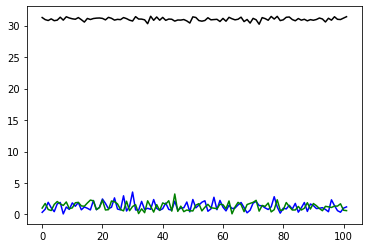

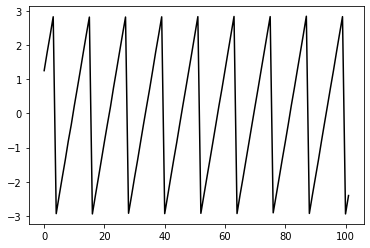

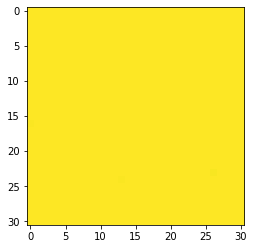

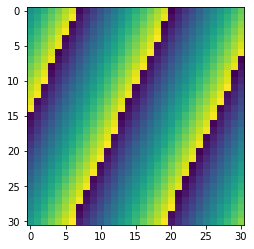

(961,) (961, 961)
第 1 主成分寄与率： 89.0387966223451 インデックス: 960
第 2 主成分寄与率： 0.1899253844806355 インデックス: 959
第 3 主成分寄与率： 0.18439208704513682 インデックス: 958
第 4 主成分寄与率： 0.18069185263939738 インデックス: 957
第 5 主成分寄与率： 0.17655932643717848 インデックス: 956
第 6 主成分寄与率： 0.17455862897368568 インデックス: 955
第 7 主成分寄与率： 0.1704307387817662 インデックス: 954
第 8 主成分寄与率： 0.1683566669453303 インデックス: 953
第 9 主成分寄与率： 0.16633654785499571 インデックス: 952
第 10 主成分寄与率： 0.1636538792469752 インデックス: 951
第 10 主成分までの累積寄与率: 90.6137017347502
(102, 2)
(961, 2) (102, 2)


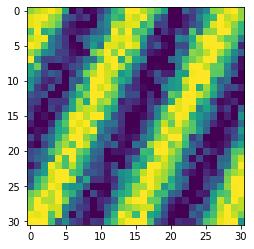

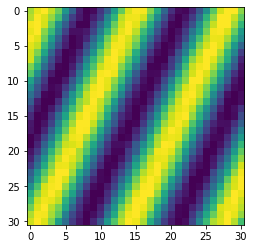

In [13]:
spatial,score,eig_val=pt.calc_EOF_from_xyt(data,mmin=1,mmax=3)

plt.plot(np.abs(score[:,0]),color="black")  #第1モード
plt.plot(np.abs(score[:,1]),color="blue")  #第1モード
plt.plot(np.abs(score[:,2]),color="green")  #第1モード
plt.show()
plt.plot(np.angle(score[:,0]),color="black")  #第1モード
#plt.plot(np.angle(score[:,1]),color="blue")  #第1モード
#plt.plot(np.angle(score[:,2]),color="green")  #第1モード
plt.show()

plt.imshow(np.abs(spatial[0,:,:]),vmin=-0.03,vmax=0.03) #第一モード
plt.show()
plt.imshow(np.angle(spatial[0,:,:]))
plt.show()

data2=pt.remove_noise_for_xyt(data,2)

plt.imshow(data[8,:,:].real,vmin=-1,vmax=1)
plt.show()
plt.imshow(data2[8,:,:].real,vmin=-1,vmax=1)


-7.3541729321853815
6.852455030665913


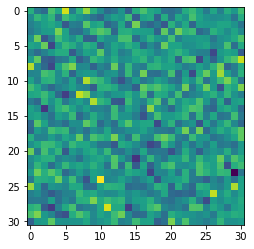

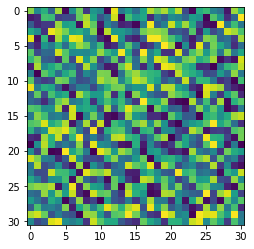

In [4]:
#色々試してみよう

xmax=31
ymax=31
tmax=102

##add another wave
#data=1.5*tdt.make_wave_3D(30,45,1.0,[tmax,ymax,xmax])+tdt.make_wave_3D(10,135,1.5,[tmax,ymax,xmax])

##add offset
data=tdt.make_wave_3D(60,120,2.0,[tmax,ymax,xmax])

#add temporal variation
#data=1.5*tdt.make_wave_3D(30,45,1.0,[tmax,ymax,xmax])+1.0*tdt.make_wave_3D(10,45,0.0,[tmax,ymax,xmax])

##add stationary wave
# data=1.5*tdt.make_wave_3D(30,90,1.0,[tmax,ymax,xmax])+1.0*tdt.make_wave_3D(30,45,1.0,[tmax,ymax,xmax])+1.0*tdt.make_wave_3D(30,135,1.0,[tmax,ymax,xmax])

##replace a part to another wave
#data=tdt.make_wave_3D(30,45,1.0,[tmax,ymax,xmax])
#data[40:60,:,:] = tdt.make_wave_3D(60,120,1.5,[20,ymax,xmax])

##add instant variation
# data=tdt.make_wave_3D(30,45,1.0,[tmax,ymax,xmax])
# data[40:60,:,:] += tdt.make_wave_3D(60,120,1.5,[20,ymax,xmax])

#add instant variation
#data=tdt.make_wave_3D(30,45,1.0,[tmax,ymax,xmax])
#data[40:60,:,:] += tdt.make_wave_3D(1,120,1.5,[20,ymax,xmax])

data=data+np.random.normal(0,1.5,(tmax,ymax,xmax))+1j*np.random.normal(0,1.5,(tmax,ymax,xmax))


test=np.angle(data[0,:,:])
print(data.real.min())
print(data.real.max())
plt.imshow(data[45,:,:].real)

plt.show()
plt.imshow(test)

(961,) (961, 961)
第 1 主成分寄与率： 19.40029287078181 インデックス: 960
第 2 主成分寄与率： 1.3865166719184558 インデックス: 959
第 3 主成分寄与率： 1.3475373264440644 インデックス: 958
第 4 主成分寄与率： 1.3291349038731204 インデックス: 957
第 5 主成分寄与率： 1.309013610950038 インデックス: 956
第 6 主成分寄与率： 1.2813132369936773 インデックス: 955
第 7 主成分寄与率： 1.2582089224202377 インデックス: 954
第 8 主成分寄与率： 1.2308698862759482 インデックス: 953
第 9 主成分寄与率： 1.2176560385822683 インデックス: 952
第 10 主成分寄与率： 1.2084796428744984 インデックス: 951
第 10 主成分までの累積寄与率: 30.96902311111412
[1031.91949882   73.75010257]


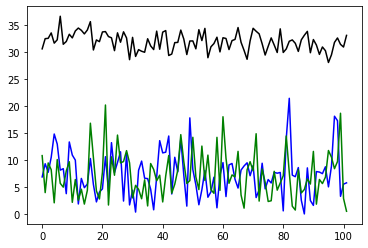

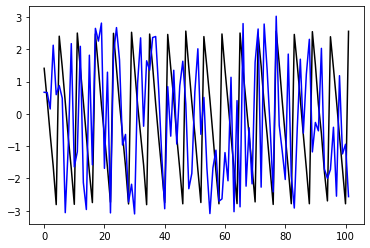

spatial matrix for mode 1


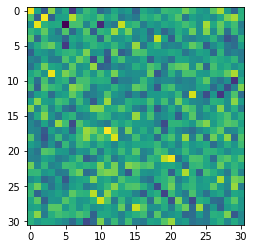

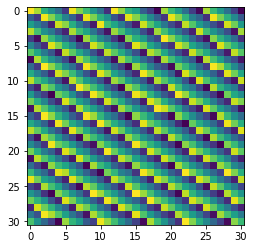

spatial matrix for mode 2


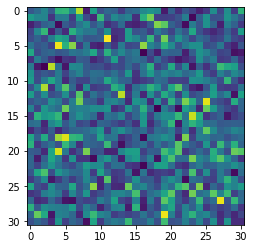

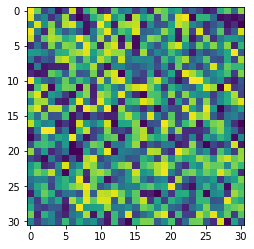

(961,) (961, 961)
第 1 主成分寄与率： 19.40029287078181 インデックス: 960
第 2 主成分寄与率： 1.3865166719184558 インデックス: 959
第 3 主成分寄与率： 1.3475373264440644 インデックス: 958
第 4 主成分寄与率： 1.3291349038731204 インデックス: 957
第 5 主成分寄与率： 1.309013610950038 インデックス: 956
第 6 主成分寄与率： 1.2813132369936773 インデックス: 955
第 7 主成分寄与率： 1.2582089224202377 インデックス: 954
第 8 主成分寄与率： 1.2308698862759482 インデックス: 953
第 9 主成分寄与率： 1.2176560385822683 インデックス: 952
第 10 主成分寄与率： 1.2084796428744984 インデックス: 951
第 10 主成分までの累積寄与率: 30.96902311111412
(961, 2) (2, 102)
(102, 31, 31)


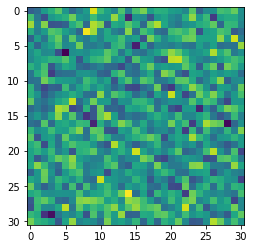

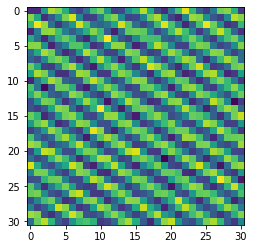

In [5]:
spatial,score,eig_val=pt.calc_EOF_from_xyt(data,mmin=1,mmax=3)
print(eig_val[0:2])

plt.plot(np.abs(score[0,:]),color="black")  #第1モード
plt.plot(np.abs(score[1,:]),color="blue")  #第1モード
plt.plot(np.abs(score[2,:]),color="green")  #第1モード
plt.show()
plt.plot(np.angle(score[0,:]),color="black")  #第1モード
plt.plot(np.angle(score[1,:]),color="blue")  #第1モード
#plt.plot(np.angle(score[2,:]),color="green")  #第1モード
plt.show()

print('spatial matrix for mode 1')
plt.imshow(np.abs(spatial[0,:,:])) #第一モード
plt.show()
plt.imshow(np.angle(spatial[0,:,:]))
plt.show()

print('spatial matrix for mode 2')
plt.imshow(np.abs(spatial[1,:,:])) #第2モード
plt.show()
plt.imshow(np.angle(spatial[1,:,:]))
plt.show()

data2=pt.remove_noise_for_xyt(data,2)
print(data2.shape)
plt.imshow(data[8,:,:].real)
plt.show()
plt.imshow(data2[8,:,:].real)


